<b>Data source from Movie 100k dataset</b>
<p>Data loading and exploratory data analysis

In [1]:
## import and load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in the datafiles
# u.item - info about movies- includes movie id and genre info
# u.info - number of users, items, ratings in the dataset
# u.data - the full u dataset, 100k ratings by 943 users on 1682 items; each user rated at least 20 items
# u.user - demographic info of user data

items_df = r"/content/u.item"
users_df = r"/content/u.user"
ratings_df = r"/content/u.data"
info_df = r"/content/u.info"




In [3]:
items_df

'/content/u.item'

In [5]:
column_names = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
user_data = pd.read_csv(users_df, sep='|', names=column_names)

In [6]:
user_data

user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]

In [ ]:
user_data.to_csv('user_data.csv', index=False)


In [7]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings = pd.read_csv(ratings_df, sep='\t', names=names)

In [8]:
ratings

user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]

In [ ]:
ratings.to_csv('ratings.csv')

In [9]:
with open(items_df, 'r', encoding = 'utf-8', errors='ignore') as file:
  content = file.readlines()

# Use pandas to read the content
from io import StringIO
data = StringIO(''.join(content))


temp_column_names = [i for i in range(25)]
items = pd.read_csv(data, sep = '|', names = temp_column_names)

In [10]:
items = items.drop([3,4,24],axis =1)

In [11]:
item_genres = items.iloc[:,3:]
item_genres =  item_genres.values.tolist()
item_genres = [np.array(row) for row in item_genres]

In [12]:
items = items.iloc[:,:3]

In [13]:
items['genres'] = item_genres

In [14]:
items = items.set_axis(['movie_id','title','date','genre'],axis = 1)
items

movie_id                                      title         date  \
0            1                           Toy Story (1995)  01-Jan-1995   
1            2                           GoldenEye (1995)  01-Jan-1995   
2            3                          Four Rooms (1995)  01-Jan-1995   
3            4                          Get Shorty (1995)  01-Jan-1995   
4            5                             Copycat (1995)  01-Jan-1995   
...        ...                                        ...          ...   
1677      1678                          Mat' i syn (1997)  06-Feb-1998   
1678      1679                           B. Monkey (1998)  06-Feb-1998   
1679      1680                       Sliding Doors (1998)  01-Jan-1998   
1680      1681                        You So Crazy (1994)  01-Jan-1994   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   

                                                  genre  
0     [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
4     [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
1677  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
1678  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  
1679  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...  
1680  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1681  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  

[1682 rows x 4 columns]

In [ ]:
items.to_csv(r'movies_info.csv')

In [15]:
with open(items_df, 'r', encoding='utf-8', errors='ignore') as file:
    content = file.readlines()

# Use pandas to read the content
from io import StringIO
data = StringIO(''.join(content))
temp_column_names = [i for i in range(25)]
genre_tab = pd.read_csv(data, sep = '|', names = temp_column_names)

In [16]:
genre_tab = genre_tab.iloc[:,5:24]

In [17]:
name =['unknown','Action', 'Adventure', 'Animation',
              'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']

genre_tab = genre_tab.set_axis(name,axis =1)
genre_tab

unknown  Action  Adventure  Animation  Children  Comedy  Crime  \
0           0       0          0          1         1       1      0   
1           0       1          1          0         0       0      0   
2           0       0          0          0         0       0      0   
3           0       1          0          0         0       1      0   
4           0       0          0          0         0       0      1   
...       ...     ...        ...        ...       ...     ...    ...   
1677        0       0          0          0         0       0      0   
1678        0       0          0          0         0       0      0   
1679        0       0          0          0         0       0      0   
1680        0       0          0          0         0       1      0   
1681        0       0          0          0         0       0      0   

      Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0               0      0        0          0       0        0        0   
1               0      0        0          0       0        0        0   
2               0      0        0          0       0        0        0   
3               0      1        0          0       0        0        0   
4               0      1        0          0       0        0        0   
...           ...    ...      ...        ...     ...      ...      ...   
1677            0      1        0          0       0        0        0   
1678            0      0        0          0       0        0        0   
1679            0      1        0          0       0        0        0   
1680            0      0        0          0       0        0        0   
1681            0      1        0          0       0        0        0   

      Romance  Sci-Fi  Thriller  War  Western  
0           0       0         0    0        0  
1           0       0         1    0        0  
2           0       0         1    0        0  
3           0       0         0    0        0  
4           0       0         1    0        0  
...       ...     ...       ...  ...      ...  
1677        0       0         0    0        0  
1678        1       0         1    0        0  
1679        1       0         0    0        0  
1680        0       0         0    0        0  
1681        0       0         0    0        0  

[1682 rows x 19 columns]

In [18]:
# Count the occurrence of each genre
genre_count = genre_tab.sum()

# Create a dictionary with column (category) names and their respective counts
genre_count_dict = dict(genre_count)

# Print the dictionary
print(genre_count_dict)

{'unknown': 2, 'Action': 251, 'Adventure': 135, 'Animation': 42, 'Children': 122, 'Comedy': 505, 'Crime': 109, 'Documentary': 50, 'Drama': 725, 'Fantasy': 22, 'Film-Noir': 24, 'Horror': 92, 'Musical': 56, 'Mystery': 61, 'Romance': 247, 'Sci-Fi': 101, 'Thriller': 251, 'War': 71, 'Western': 27}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Children'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Documentary'),
  Text(8, 0, 'Drama'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Film-Noir'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Musical'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Romance'),
  Text(15, 0, 'Sci-Fi'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

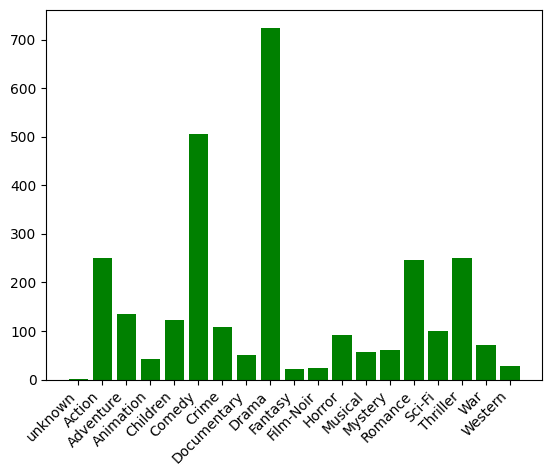

In [19]:
plt.bar(name, list(genre_count), color='green')
plt.xticks(rotation=45, ha='right', fontsize=10)

Text(0.5, 1.0, 'User Gender Ratio')

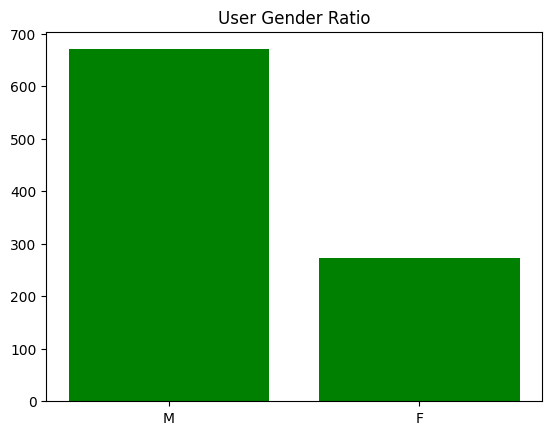

In [20]:
# count the gender and display ratio
gender_count = user_data['gender'].value_counts()

plt.bar(['M','F'], list(gender_count), color = 'green')
plt.title('User Gender Ratio')

In [21]:
user_data

user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]

In [22]:
ratings

user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]

In [23]:
# Pivot the DataFrame
pivoted_ratings = ratings.pivot(index='user_id', columns='item_id', values='rating')

# Print the result
print(pivoted_ratings)

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN  ...   
940       NaN   NaN   NaN   2.0   NaN   NaN   4.0   5.0   3.0   NaN  ...   
941       5.0   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN  ...   
942       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   

item_id  16

In [24]:
summary = pivoted_ratings.describe()
print(summary)

item_id        1           2          3           4          5          6     \
count    452.000000  131.000000  90.000000  209.000000  86.000000  26.000000   
mean       3.878319    3.206107   3.033333    3.550239   3.302326   3.576923   
std        0.927897    0.966497   1.212760    0.965069   0.946446   1.301478   
min        1.000000    1.000000   1.000000    1.000000   1.000000   1.000000   
25%        3.000000    3.000000   2.000000    3.000000   3.000000   3.000000   
50%        4.000000    3.000000   3.000000    4.000000   3.000000   4.000000   
75%        5.000000    4.000000   4.000000    4.000000   4.000000   5.000000   
max        5.000000    5.000000   5.000000    5.000000   5.000000   5.000000   

item_id        7           8           9          10    ...  1673  1674  1675  \
count    392.000000  219.000000  299.000000  89.000000  ...   1.0   1.0   1.0   
mean       3.798469    3.995434    3.896321   3.831461  ...   3.0   4.0   3.0   
std        0.982037    1.002281    1

In [25]:
# replacing all NaNs for the ratings with 0
pivoted_ratings = pivoted_ratings.fillna(0)

In [26]:
pivoted_ratings

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         4.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0   0.0  ...   
940       0.0   0.0   0.0   2.0   0.0   0.0   4.0   5.0   3.0   0.0  ...   
941       5.0   0.0   0.0   0.0   0.0   0.0   4.0   0.0   0.0   0.0  ...   
942       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
943       0.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
939       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
940       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
941       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
942       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
943       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[943 rows x 1682 columns]

In [27]:
# Merging the user data frames into one big one to do more data analysis

merged_data = pd.merge(user_data, pivoted_ratings, on='user_id')
print(merged_data)

     user_id  age gender     occupation zip_code    1    2    3    4    5  \
0          1   24      M     technician    85711  5.0  3.0  4.0  3.0  3.0   
1          2   53      F          other    94043  4.0  0.0  0.0  0.0  0.0   
2          3   23      M         writer    32067  0.0  0.0  0.0  0.0  0.0   
3          4   24      M     technician    43537  0.0  0.0  0.0  0.0  0.0   
4          5   33      F          other    15213  4.0  3.0  0.0  0.0  0.0   
..       ...  ...    ...            ...      ...  ...  ...  ...  ...  ...   
938      939   26      F        student    33319  0.0  0.0  0.0  0.0  0.0   
939      940   32      M  administrator    02215  0.0  0.0  0.0  2.0  0.0   
940      941   20      M        student    97229  5.0  0.0  0.0  0.0  0.0   
941      942   48      F      librarian    78209  0.0  0.0  0.0  0.0  0.0   
942      943   22      M        student    77841  0.0  5.0  0.0  0.0  0.0   

     ...  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
0   

In [28]:
summary = merged_data.describe()
print(summary)

          user_id         age           1           2           3           4  \
count  943.000000  943.000000  943.000000  943.000000  943.000000  943.000000   
mean   472.000000   34.051962    1.858961    0.445387    0.289502    0.786850   
std    272.364951   12.192740    2.042084    1.166107    0.966513    1.543481   
min      1.000000    7.000000    0.000000    0.000000    0.000000    0.000000   
25%    236.500000   25.000000    0.000000    0.000000    0.000000    0.000000   
50%    472.000000   31.000000    0.000000    0.000000    0.000000    0.000000   
75%    707.500000   43.000000    4.000000    0.000000    0.000000    0.000000   
max    943.000000   73.000000    5.000000    5.000000    5.000000    5.000000   

                5           6           7           8  ...        1673  \
count  943.000000  943.000000  943.000000  943.000000  ...  943.000000   
mean     0.301166    0.098621    1.579003    0.927890  ...    0.003181   
std      0.992792    0.623179    1.977008    1.7

In [29]:
merged_data.to_csv('movie_100k_all_user.csv')

In [30]:
merged_data.columns

Index([   'user_id',        'age',     'gender', 'occupation',   'zip_code',
                  1,            2,            3,            4,            5,
       ...
               1673,         1674,         1675,         1676,         1677,
               1678,         1679,         1680,         1681,         1682],
      dtype='object', length=1687)

# Cluster analyses to identify potential trends or trait groupings for user profiles

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Select relevant demographic columns and ratings
selected_columns = ['age', 'gender', 'occupation'] + list(range(1,1683))

#creating a new DF with the selected columns for analysis
X = merged_data[selected_columns]

#convert occupation & gender categorical values to numeric
le_gender = LabelEncoder()
X['gender'] = le_gender.fit_transform(X['gender'])
le_occupation = LabelEncoder()
X['occupation'] = le_occupation.fit_transform(X['occupation'])

# Convert all column names to strings
X.columns = X.columns.astype(str)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # Example with 3 clusters
kmeans.fit(X)

merged_data['cluster'] = kmeans.labels_  # Assign clusters to users

print(merged_data[['user_id','cluster']])

     user_id  cluster
0          1        0
1          2        2
2          3        1
3          4        1
4          5        0
..       ...      ...
938      939        1
939      940        1
940      941        1
941      942        2
942      943        0

[943 rows x 2 columns]


<ipython-input-31-d0dc31b935dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le_gender.fit_transform(X['gender'])
<ipython-input-31-d0dc31b935dd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'] = le_occupation.fit_transform(X['occupation'])


In [32]:
# Convert categorical columns to numeric using encoding (if applicable)
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
le_gender = LabelEncoder()
le_occupation = LabelEncoder()

merged_data['gender_encoded'] = le_gender.fit_transform(merged_data['gender'])
merged_data['occupation_encoded'] = le_occupation.fit_transform(merged_data['occupation'])

# Separate numeric columns
numeric_columns = merged_data.select_dtypes(include='number')

# Calculate mean of each numeric feature for each cluster
cluster_summary_numeric = numeric_columns.groupby(merged_data['cluster']).mean()
print("Cluster Summary for Numeric Data:\n", cluster_summary_numeric)

# Analyze categorical columns
categorical_columns = merged_data.select_dtypes(include='object')

for col in categorical_columns.columns:
    if col != 'cluster':  # Exclude the cluster column itself
        print(f"Value counts for {col} within clusters:")
        print(merged_data.groupby('cluster')[col].value_counts())
        print()

Cluster Summary for Numeric Data:
             user_id        age         1         2         3         4  \
cluster                                                                  
0        459.095833  32.758333  3.116667  1.404167  0.650000  2.279167   
1        475.600484  25.368039  1.677966  0.174334  0.242131  0.343826   
2        477.551724  47.489655  1.075862  0.037931  0.058621  0.182759   

                5         6         7         8  ...      1676    1677  \
cluster                                          ...                     
0        0.808333  0.162500  2.783333  2.316667  ...  0.000000  0.0125   
1        0.196126  0.065375  1.476998  0.530266  ...  0.004843  0.0000   
2        0.031034  0.093103  0.727586  0.344828  ...  0.000000  0.0000   

             1678      1679      1680    1681    1682  cluster  \
cluster                                                          
0        0.000000  0.000000  0.000000  0.0125  0.0125      0.0   
1        0.002421  0.0072

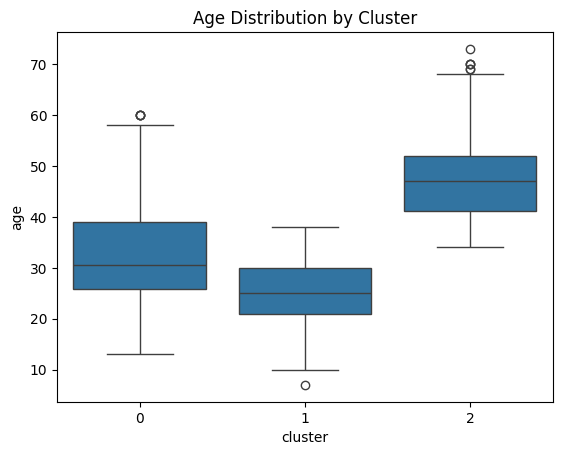

ValueError: Could not interpret value `1` for `y`. An entry with this name does not appear in `data`.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for age
sns.boxplot(x='cluster', y='age', data=merged_data)
plt.title('Age Distribution by Cluster')
plt.show()

# Example for movie ratings (for a specific movie, e.g., movie 1)
sns.boxplot(x='cluster', y='1', data=merged_data)
plt.title('Ratings for Movie 1 by Cluster')
plt.show()

In [35]:
# Display unique values to diagnose the issue
print(merged_data['cluster'].unique())

[0 2 1]


          PC1        PC2  cluster
0 -471.066585 -28.874273        0
1 -469.969605  16.971305        2
2 -468.951903   9.017027        1
3 -467.957793   8.680295        1
4 -467.009353  -7.158335        0


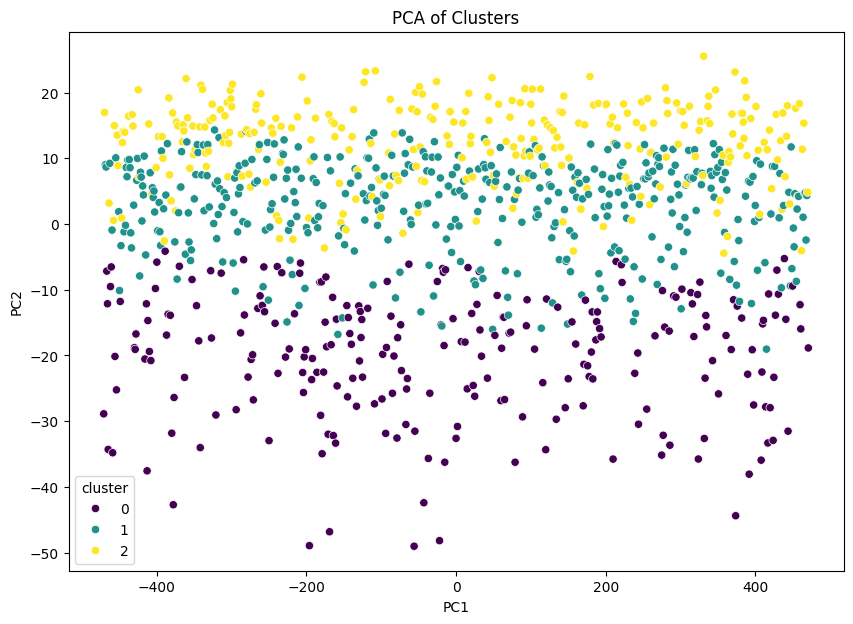

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Select only numeric columns
numeric_data = merged_data.select_dtypes(include='number')
# convert column names to strings
numeric_data.columns = numeric_data.columns.astype(str)
# Convert to numeric and drop rows with NaN values
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')
numeric_data = numeric_data.dropna()

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['cluster'] = merged_data['cluster'].values

print(pca_df.head())
# Plot PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('PCA of Clusters')
plt.show()

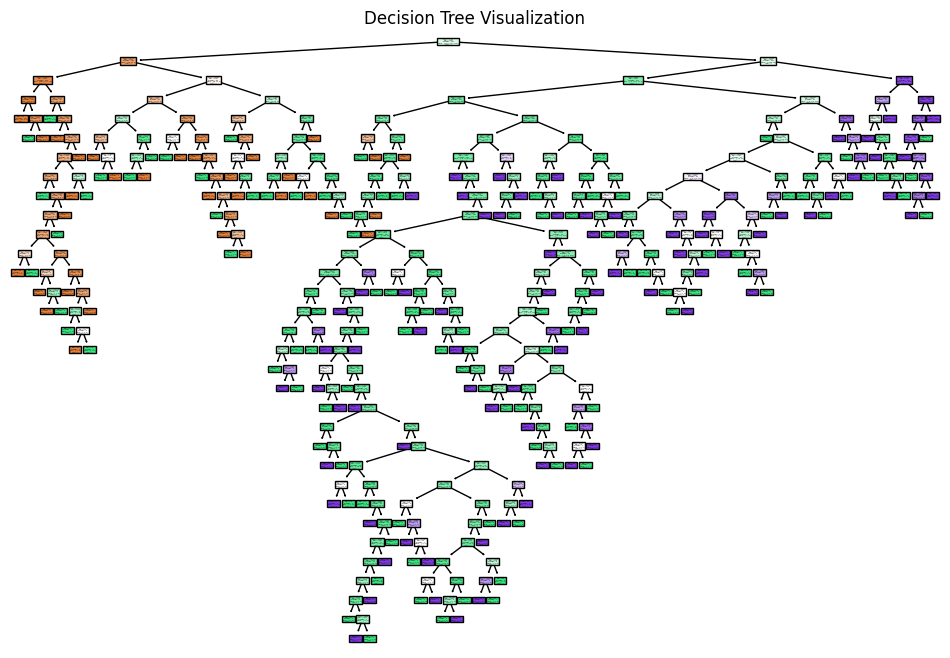

Feature importances: [0.19875474 0.80124526]


In [82]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Prepare features (X) and target (y)
X = pca_df[['PC1', 'PC2']]  # Using PCA results as features
y = pca_df['cluster']       # Using cluster labels as target

# Fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=['PC1', 'PC2'], class_names=[str(c) for c in np.unique(y)])
plt.title("Decision Tree Visualization")
plt.show()

# Check the feature importances as well
print("Feature importances:", dt.feature_importances_)

In [37]:
# Calculate the average age per cluster
age_per_cluster = merged_data.groupby('cluster')['age'].mean().reset_index()

# Calculate gender distribution per cluster
gender_per_cluster = merged_data.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

# Calculate occupation distribution per cluster
occupation_per_cluster = merged_data.groupby(['cluster', 'occupation']).size().unstack(fill_value=0)

# View demographic breakdown
print(age_per_cluster)
print(gender_per_cluster)
print(occupation_per_cluster)

   cluster        age
0        0  32.758333
1        1  25.368039
2        2  47.489655
gender     F    M
cluster          
0         52  188
1        120  293
2        101  189
occupation  administrator  artist  doctor  educator  engineer  entertainment  \
cluster                                                                        
0                      21       5       1        20        27              5   
1                      23      15       1        22        17              9   
2                      35       8       5        53        23              4   

occupation  executive  healthcare  homemaker  lawyer  ...  marketing  none  \
cluster                                               ...                    
0                   8           5          0       4  ...          5     2   
1                  10           4          5       4  ...         10     6   
2                  14           7          2       4  ...         11     1   

occupation  other  programmer 

In [38]:
merged_data.columns

Index([           'user_id',                'age',             'gender',
               'occupation',           'zip_code',                    1,
                          2,                    3,                    4,
                          5,
       ...
                       1676,                 1677,                 1678,
                       1679,                 1680,                 1681,
                       1682,            'cluster',     'gender_encoded',
       'occupation_encoded'],
      dtype='object', length=1690)

In [39]:
merged_data.to_csv('movie_100k_all_user.csv')

In [40]:
# Relabel the movie columns (1-1682) as strings
merged_data.columns = merged_data.columns.map(lambda x: str(x) if isinstance(x, int) else x)

In [41]:
# Print the column names of the DataFrame
print(merged_data.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code', '1', '2', '3',
       '4', '5',
       ...
       '1676', '1677', '1678', '1679', '1680', '1681', '1682', 'cluster',
       'gender_encoded', 'occupation_encoded'],
      dtype='object', length=1690)


In [42]:
# Ensure that only movie rating columns (1-1682) are included in the calculation
numeric_movie_columns = merged_data.loc[:, '1':'1682']

# Add the cluster labels back to the original data
merged_data['cluster'] = pca_df['cluster']

# Group by cluster and calculate the mean of only the movie rating columns
cluster_movie_ratings = merged_data.groupby('cluster')[numeric_movie_columns.columns].mean().reset_index()

# View the average ratings for each movie in each cluster
print(cluster_movie_ratings.head())

   cluster         1         2         3         4         5         6  \
0        0  3.116667  1.404167  0.650000  2.279167  0.808333  0.162500   
1        1  1.677966  0.174334  0.242131  0.343826  0.196126  0.065375   
2        2  1.075862  0.037931  0.058621  0.182759  0.031034  0.093103   

          7         8         9  ...      1673      1674      1675      1676  \
0  2.783333  2.316667  2.129167  ...  0.000000  0.016667  0.000000  0.000000   
1  1.476998  0.530266  0.842615  ...  0.000000  0.000000  0.007264  0.004843   
2  0.727586  0.344828  1.055172  ...  0.010345  0.000000  0.000000  0.000000   

     1677      1678      1679      1680    1681    1682  
0  0.0125  0.000000  0.000000  0.000000  0.0125  0.0125  
1  0.0000  0.002421  0.007264  0.004843  0.0000  0.0000  
2  0.0000  0.000000  0.000000  0.000000  0.0000  0.0000  

[3 rows x 1683 columns]


In [43]:
# Identifying Top-Rated Movies per Cluster:
# Get the top-rated movies for each cluster
top_movies_per_cluster = cluster_movie_ratings.melt(id_vars='cluster', var_name='movie_id', value_name='rating')
top_movies_per_cluster = top_movies_per_cluster.groupby('cluster').apply(lambda x: x.nlargest(5, 'rating')).reset_index(drop=True)

# View the top-rated movies per cluster
print(top_movies_per_cluster)

    cluster movie_id    rating
0         0       50  4.212500
1         0      174  4.212500
2         0       98  3.841667
3         0      172  3.754167
4         0      181  3.666667
5         1       50  2.498789
6         1      288  2.273608
7         1      258  2.014528
8         1      181  1.910412
9         1      294  1.874092
10        2      286  2.403448
11        2      100  2.003448
12        2      258  1.889655
13        2       50  1.717241
14        2      300  1.717241


In [44]:
#cluster 0 top 5 movie ratings
print(items.iloc[[49, 257, 287, 180, 293]],['title','movie_id'])

     movie_id                      title         date  \
49         50           Star Wars (1977)  01-Jan-1977   
257       258             Contact (1997)  11-Jul-1997   
287       288              Scream (1996)  20-Dec-1996   
180       181  Return of the Jedi (1983)  14-Mar-1997   
293       294           Liar Liar (1997)  21-Mar-1997   

                                                 genre  
49   [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  
257  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
287  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
180  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  
293  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   ['title', 'movie_id']


In [45]:
#cluster 1 top 5 movie ratings
print(items.iloc[[49, 173, 97, 171, 180]],['title','movie_id'])

     movie_id                             title         date  \
49         50                  Star Wars (1977)  01-Jan-1977   
173       174    Raiders of the Lost Ark (1981)  01-Jan-1981   
97         98  Silence of the Lambs, The (1991)  01-Jan-1991   
171       172   Empire Strikes Back, The (1980)  01-Jan-1980   
180       181         Return of the Jedi (1983)  14-Mar-1997   

                                                 genre  
49   [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...  
173  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
97   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
171  [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...  
180  [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   ['title', 'movie_id']


In [46]:
#cluster 2 top 5 movie ratings
print(items.iloc[[285, 99, 257, 299, 49]],['title','movie_id'])

     movie_id                        title         date  \
285       286  English Patient, The (1996)  15-Nov-1996   
99        100                 Fargo (1996)  14-Feb-1997   
257       258               Contact (1997)  11-Jul-1997   
299       300         Air Force One (1997)  01-Jan-1997   
49         50             Star Wars (1977)  01-Jan-1977   

                                                 genre  
285  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...  
99   [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...  
257  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...  
299  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
49   [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...   ['title', 'movie_id']


In [47]:
print(merged_data.columns)

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code', '1', '2', '3',
       '4', '5',
       ...
       '1676', '1677', '1678', '1679', '1680', '1681', '1682', 'cluster',
       'gender_encoded', 'occupation_encoded'],
      dtype='object', length=1690)


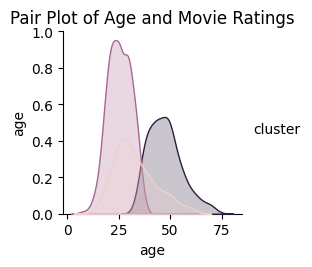

In [48]:
# Example for age and ratings
sns.pairplot(merged_data[['age', 'gender', 'occupation', 'cluster']], hue='cluster')
plt.title('Pair Plot of Age and Movie Ratings')
plt.show()

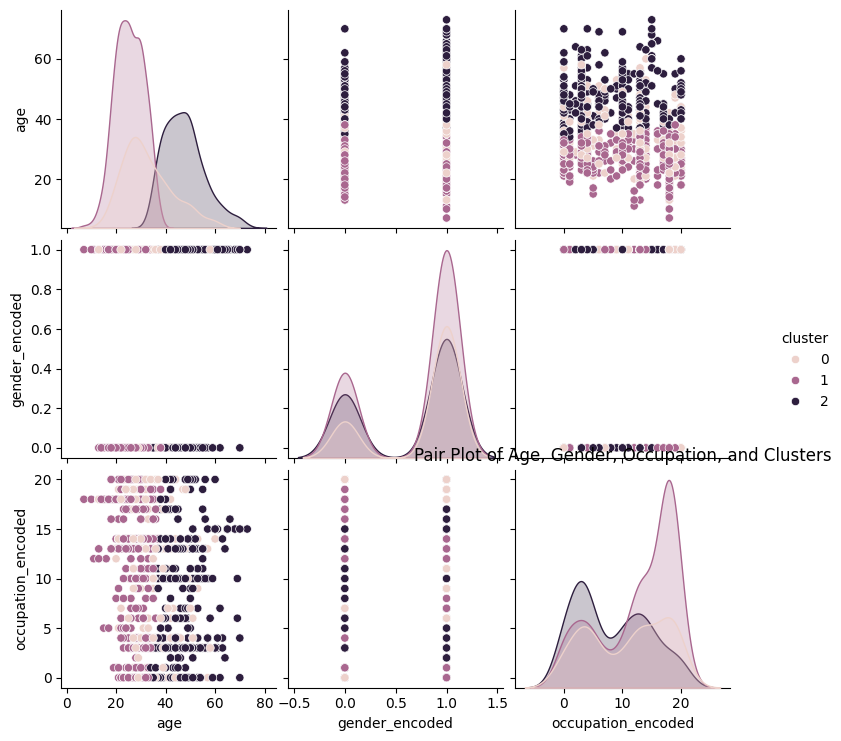

In [49]:
# Use encoded columns for better visualization
sns.pairplot(merged_data[['age', 'gender_encoded', 'occupation_encoded', 'cluster']], hue='cluster')
plt.title('Pair Plot of Age, Gender, Occupation, and Clusters')
plt.show()

In [50]:
print('age' in merged_data.columns)         # Should return True if 'age' exists
print('gender' in merged_data.columns)      # Should return True if 'gender' exists
print('occupation' in merged_data.columns)  # Should return True if 'occupation' exists

True
True
True


In [51]:
user_genre = pd.read_csv('/content/drive/MyDrive/RL/Dataset_baseline/ml-100k/user_genre.csv')

In [52]:
user_genre

Unnamed: 0  unknown    Action  Adventure  Animation  Children    Comedy  \
0           308      0.0  3.605263   3.604651   4.083333    3.7200  3.865079   
1           287      0.0  4.050000   4.125000   3.333333    4.0000  3.869565   
2           148      0.0  3.916667   3.933333   4.428571    3.8000  4.450000   
3           280      0.0  3.068493   3.051282   3.846154    3.6875  3.674699   
4            66      0.0  3.437500   3.000000   3.000000    3.0000  3.333333   
..          ...      ...       ...        ...        ...       ...       ...   
938         273      0.0  3.000000   3.000000   0.000000    3.0000  3.857143   
939         685      0.0  1.000000   0.000000   0.000000    0.0000  2.250000   
940         713      0.0  2.200000   0.000000   0.000000    3.0000  2.857143   
941         631      0.0  2.666667   2.000000   0.000000    0.0000  2.600000   
942         729      0.0  3.500000   0.000000   0.000000    1.0000  2.285714   

        Crime  Documentary     Drama  ...  Film-Noir    Horror   Musical  \
0    3.945946          4.4  3.699387  ...   4.230769  3.703704  3.785714   
1    4.888889          0.0  4.363636  ...   0.000000  3.800000  0.000000   
2    3.666667          0.0  3.680000  ...   5.000000  2.000000  4.454545   
3    3.666667          0.0  3.735632  ...   4.500000  3.416667  3.933333   
4    3.666667          0.0  3.571429  ...   0.000000  4.000000  1.000000   
..        ...          ...       ...  ...        ...       ...       ...   
938  3.500000          0.0  3.733333  ...   0.000000  2.000000  4.000000   
939  1.800000          0.0  2.222222  ...   2.500000  2.000000  2.000000   
940  3.000000          0.0  3.111111  ...   4.000000  3.000000  1.000000   
941  3.250000          0.0  3.750000  ...   0.000000  3.000000  4.000000   
942  1.000000          0.0  2.600000  ...   0.000000  2.000000  4.000000   

      Mystery   Romance    Sci-Fi  Thriller       War   Western  user_avg  
0    3.789474  3.681818  3.825000  3.743902  3.766667  3.777778  3.621048  
1    4.666667  3.909091  3.727273  4.111111  3.800000  0.000000  2.770767  
2    3.000000  4.333333  4.461538  3.600000  4.100000  2.000000  3.201298  
3    3.857143  3.592593  3.129032  3.500000  3.550000  3.000000  3.177677  
4    3.000000  3.375000  3.750000  3.500000  3.800000  0.000000  2.391259  
..        ...       ...       ...       ...       ...       ...       ...  
938  3.333333  3.666667  0.000000  3.600000  3.500000  0.000000  2.115288  
939  2.000000  1.833333  0.000000  2.000000  1.000000  0.000000  1.084503  
940  3.000000  2.800000  2.000000  2.888889  2.333333  0.000000  1.852130  
941  2.666667  3.000000  0.000000  3.142857  3.000000  0.000000  1.740852  
942  3.666667  3.600000  0.000000  3.444444  2.500000  0.000000  1.557728  

[943 rows x 21 columns]

In [53]:
user_genre.rename(columns={'Unnamed: 0': 'user_id'}, inplace=True)
print(user_genre)

     user_id  unknown    Action  Adventure  Animation  Children    Comedy  \
0        308      0.0  3.605263   3.604651   4.083333    3.7200  3.865079   
1        287      0.0  4.050000   4.125000   3.333333    4.0000  3.869565   
2        148      0.0  3.916667   3.933333   4.428571    3.8000  4.450000   
3        280      0.0  3.068493   3.051282   3.846154    3.6875  3.674699   
4         66      0.0  3.437500   3.000000   3.000000    3.0000  3.333333   
..       ...      ...       ...        ...        ...       ...       ...   
938      273      0.0  3.000000   3.000000   0.000000    3.0000  3.857143   
939      685      0.0  1.000000   0.000000   0.000000    0.0000  2.250000   
940      713      0.0  2.200000   0.000000   0.000000    3.0000  2.857143   
941      631      0.0  2.666667   2.000000   0.000000    0.0000  2.600000   
942      729      0.0  3.500000   0.000000   0.000000    1.0000  2.285714   

        Crime  Documentary     Drama  ...  Film-Noir    Horror   Musical  \

In [54]:
user_genre.sort_values(by='user_id', inplace=True)
print(user_genre)

     user_id  unknown    Action  Adventure  Animation  Children    Comedy  \
129        1      4.0  3.333333   2.928571   3.333333  2.200000  3.472527   
95         2      0.0  3.800000   4.333333   4.000000  3.000000  3.812500   
813        3      0.0  2.785714   3.500000   0.000000  0.000000  2.583333   
684        4      0.0  3.875000   3.500000   0.000000  0.000000  5.000000   
5          5      4.0  3.142857   3.242424   3.785714  2.448276  3.000000   
..       ...      ...       ...        ...        ...       ...       ...   
670      939      0.0  4.055556   3.500000   4.000000  4.000000  4.533333   
517      940      0.0  3.434783   3.000000   4.500000  4.200000  3.523810   
440      941      0.0  3.800000   3.857143   4.666667  4.500000  4.142857   
763      942      0.0  4.111111   4.727273   4.750000  4.307692  4.090909   
476      943      0.0  3.546875   3.257143   3.500000  2.777778  2.964286   

        Crime  Documentary     Drama  ...  Film-Noir    Horror   Musical  \

In [55]:
user_genre.describe()

user_id     unknown      Action   Adventure   Animation    Children  \
count  943.000000  943.000000  943.000000  943.000000  943.000000  943.000000   
mean   472.000000    0.033934    3.500055    3.370455    2.500560    2.878838   
std    272.364951    0.352296    0.640551    0.987977    1.784179    1.420793   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    236.500000    0.000000    3.176471    3.000000    0.000000    2.408333   
50%    472.000000    0.000000    3.571429    3.521739    3.125000    3.250000   
75%    707.500000    0.000000    3.909091    4.000000    4.000000    3.921296   
max    943.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

           Comedy       Crime  Documentary       Drama  ...   Film-Noir  \
count  943.000000  943.000000   943.000000  943.000000  ...  943.000000   
mean     3.438750    3.531041     1.399285    3.728494  ...    2.550723   
std      0.582445    0.940929     1.920171    0.476045  ...    1.971549   
min      0.000000    0.000000     0.000000    1.542553  ...    0.000000   
25%      3.109903    3.190909     0.000000    3.437500  ...    0.000000   
50%      3.472527    3.697674     0.000000    3.750000  ...    3.333333   
75%      3.811655    4.000000     3.500000    4.057983  ...    4.000000   
max      5.000000    5.000000     5.000000    5.000000  ...    5.000000   

           Horror     Musical     Mystery     Romance      Sci-Fi    Thriller  \
count  943.000000  943.000000  943.000000  943.000000  943.000000  943.000000   
mean     2.797733    2.736636    3.436561    3.659152    3.418607    3.524035   
std      1.439675    1.572214    1.059864    0.541078    0.935114    0.613998   
min      0.000000    0.000000    0.000000    1.666667    0.000000    0.000000   
25%      2.292857    2.000000    3.000000    3.357143    3.102632    3.214286   
50%      3.200000    3.238095    3.666667    3.678571    3.560000    3.583333   
75%      3.800000    4.000000    4.000000    4.000000    4.000000    3.922577   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

              War     Western    user_avg  
count  943.000000  943.000000  943.000000  
mean     3.707737    1.909925    2.836915  
std      0.823030    1.923734    0.578347  
min      0.000000    0.000000    1.084503  
25%      3.428571    0.000000    2.423596  
50%      3.833333    2.000000    2.843744  
75%      4.200000    3.800000    3.254180  
max      5.000000    5.000000    4.230055  

[8 rows x 21 columns]

In [56]:
movie_100k_all_complete_userpf = pd.merge(merged_data, user_genre, on='user_id', how='left')
print(movie_100k_all_complete_userpf)

     user_id  age gender     occupation zip_code    1    2    3    4    5  \
0          1   24      M     technician    85711  5.0  3.0  4.0  3.0  3.0   
1          2   53      F          other    94043  4.0  0.0  0.0  0.0  0.0   
2          3   23      M         writer    32067  0.0  0.0  0.0  0.0  0.0   
3          4   24      M     technician    43537  0.0  0.0  0.0  0.0  0.0   
4          5   33      F          other    15213  4.0  3.0  0.0  0.0  0.0   
..       ...  ...    ...            ...      ...  ...  ...  ...  ...  ...   
938      939   26      F        student    33319  0.0  0.0  0.0  0.0  0.0   
939      940   32      M  administrator    02215  0.0  0.0  0.0  2.0  0.0   
940      941   20      M        student    97229  5.0  0.0  0.0  0.0  0.0   
941      942   48      F      librarian    78209  0.0  0.0  0.0  0.0  0.0   
942      943   22      M        student    77841  0.0  5.0  0.0  0.0  0.0   

     ...  Film-Noir    Horror   Musical   Mystery   Romance    Sci-Fi  \
0 

In [57]:
print(merged_data)

     user_id  age gender     occupation zip_code    1    2    3    4    5  \
0          1   24      M     technician    85711  5.0  3.0  4.0  3.0  3.0   
1          2   53      F          other    94043  4.0  0.0  0.0  0.0  0.0   
2          3   23      M         writer    32067  0.0  0.0  0.0  0.0  0.0   
3          4   24      M     technician    43537  0.0  0.0  0.0  0.0  0.0   
4          5   33      F          other    15213  4.0  3.0  0.0  0.0  0.0   
..       ...  ...    ...            ...      ...  ...  ...  ...  ...  ...   
938      939   26      F        student    33319  0.0  0.0  0.0  0.0  0.0   
939      940   32      M  administrator    02215  0.0  0.0  0.0  2.0  0.0   
940      941   20      M        student    97229  5.0  0.0  0.0  0.0  0.0   
941      942   48      F      librarian    78209  0.0  0.0  0.0  0.0  0.0   
942      943   22      M        student    77841  0.0  5.0  0.0  0.0  0.0   

     ...  1676  1677  1678  1679  1680  1681  1682  cluster  gender_encoded

In [58]:
print(movie_100k_all_complete_userpf.columns.tolist())

['user_id', 'age', 'gender', 'occupation', 'zip_code', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '15

In [59]:
#clustering with user genre info
# Select relevant demographic columns and ratings
selected_columns = ['age', 'gender', 'occupation', 'user_avg','unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

#creating a new DF with the selected columns for analysis
X = movie_100k_all_complete_userpf[selected_columns]

#convert occupation & gender categorical values to numeric
le_gender = LabelEncoder()
X['gender'] = le_gender.fit_transform(X['gender'])
le_occupation = LabelEncoder()
X['occupation'] = le_occupation.fit_transform(X['occupation'])

# Convert all column names to strings
X.columns = X.columns.astype(str)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # Example with 3 clusters
kmeans.fit(X)

movie_100k_all_complete_userpf['cluster2'] = kmeans.labels_  # Assign clusters to users

print(movie_100k_all_complete_userpf[['user_id','cluster2']])

     user_id  cluster2
0          1         0
1          2         1
2          3         0
3          4         0
4          5         2
..       ...       ...
938      939         0
939      940         2
940      941         0
941      942         1
942      943         0

[943 rows x 2 columns]


<ipython-input-59-7c3f29cca296>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['gender'] = le_gender.fit_transform(X['gender'])
<ipython-input-59-7c3f29cca296>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'] = le_occupation.fit_transform(X['occupation'])


In [61]:
# Convert categorical columns to numeric using encoding (if applicable)
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns
le_gender = LabelEncoder()
le_occupation = LabelEncoder()


movie_100k_all_complete_userpf['gender_encoded'] = le_gender.fit_transform(movie_100k_all_complete_userpf['gender'])
movie_100k_all_complete_userpf['occupation_encoded'] = le_occupation.fit_transform(movie_100k_all_complete_userpf['occupation'])
movie_100k_all_complete_userpf['user_avg'] = le_occupation.fit_transform(movie_100k_all_complete_userpf['user_avg'])


# Separate numeric columns
numeric_columns = movie_100k_all_complete_userpf.select_dtypes(include='number')

# Calculate mean of each numeric feature for each cluster
cluster_summary_numeric = numeric_columns.groupby(movie_100k_all_complete_userpf['cluster2']).mean()
print("Cluster Summary for Numeric Data:\n", cluster_summary_numeric)

# Analyze categorical columns
categorical_columns = movie_100k_all_complete_userpf.select_dtypes(include='object')

for col in categorical_columns.columns:
    if col != 'cluster2':  # Exclude the cluster column itself
        print(f"Value counts for {col} within clusters:")
        print(movie_100k_all_complete_userpf.groupby('cluster2')[col].value_counts())
        print()

Cluster Summary for Numeric Data:
              user_id        age         1         2         3         4  \
cluster2                                                                  
0         484.741538  22.889231  2.015385  0.606154  0.532308  0.910769   
1         477.530075  50.240602  1.293233  0.169173  0.097744  0.548872   
2         456.056818  32.125000  2.142045  0.505682  0.210227  0.852273   

                 5         6         7         8  ...    Horror   Musical  \
cluster2                                          ...                       
0         0.421538  0.095385  1.947692  0.963077  ...  3.027762  2.805158   
1         0.135338  0.112782  0.973684  0.800752  ...  2.423589  2.671911   
2         0.315341  0.090909  1.696023  0.991477  ...  2.868083  2.722281   

           Mystery   Romance    Sci-Fi  Thriller       War   Western  \
cluster2                                                               
0         3.330715  3.671584  3.447153  3.481889  3.696801 

          PC1         PC2  cluster2
0  611.091062  -58.635037         0
1  426.626290 -239.269632         1
2   88.001144 -572.104852         0
3  370.394931 -291.957049         0
4  387.271040 -273.913264         2


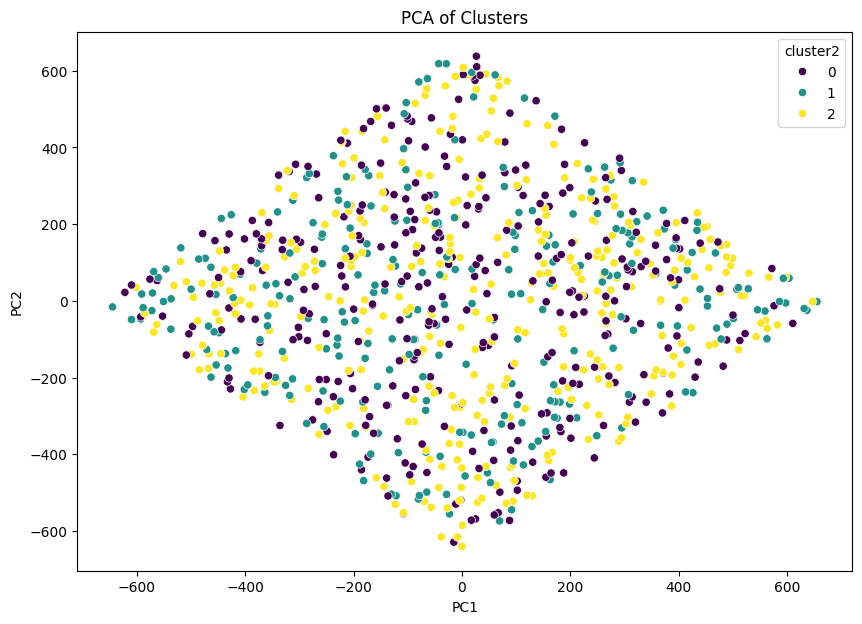

In [62]:
# Select only numeric columns
numeric_data = movie_100k_all_complete_userpf.select_dtypes(include='number')
# convert column names to strings
numeric_data.columns = numeric_data.columns.astype(str)
# Convert to numeric and drop rows with NaN values
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')
numeric_data = numeric_data.dropna()

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
pca_df['cluster2'] = movie_100k_all_complete_userpf['cluster2'].values

print(pca_df.head())
# Plot PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster2', data=pca_df, palette='viridis')
plt.title('PCA of Clusters')
plt.show()

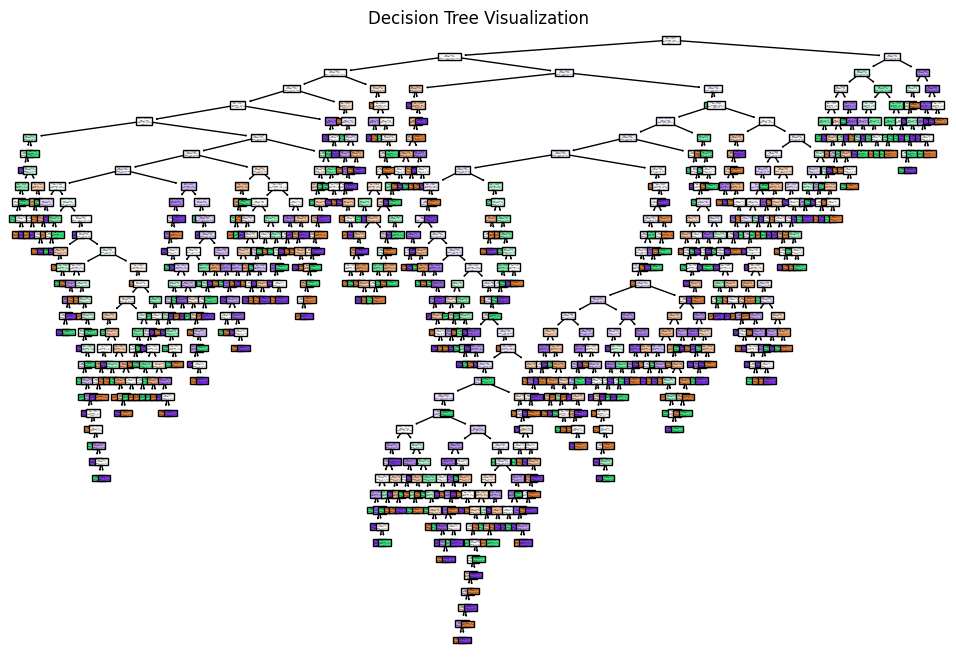

Feature importances: [0.51212857 0.48787143]


In [79]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Prepare features (X) and target (y)
X = pca_df[['PC1', 'PC2']]  # Using PCA results as features
y = pca_df['cluster2']       # Using cluster labels as target

# Fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=['PC1', 'PC2'], class_names=[str(c) for c in np.unique(y)])
plt.title("Decision Tree Visualization")
plt.show()

# Check the feature importances as well
print("Feature importances:", dt.feature_importances_)

In [ ]:
# RSA

# RSA to analyze the relationship between user traits and movie ratings

In [63]:
print(movie_100k_all_complete_userpf.columns.tolist())

['user_id', 'age', 'gender', 'occupation', 'zip_code', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '15

In [67]:
# Checking average rating for each genre
average_column = movie_100k_all_complete_userpf[['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].mean()
print(average_column)

Action         3.500055
Adventure      3.370455
Animation      2.500560
Children       2.878838
Comedy         3.438750
Crime          3.531041
Documentary    1.399285
Drama          3.728494
Fantasy        1.778863
Film-Noir      2.550723
Horror         2.797733
Musical        2.736636
Mystery        3.436561
Romance        3.659152
Sci-Fi         3.418607
Thriller       3.524035
War            3.707737
Western        1.909925
dtype: float64


In [64]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr
# This is for AVERAGE RATING.
# load full dataframe - "movie_100k_all_complete_userpf"
# Example columns: 'user_id', 'age', 'gender', 'occupation', 'user_avg'

# Step 1: Construct Representational Dissimilarity Matrices (RDMs)
# Normalize/Encode user traits as needed

# Create an RDM for 'age'
age_rdm = squareform(pdist(movie_100k_all_complete_userpf[['age']], metric='euclidean'))

# Create an RDM for 'gender' (convert categorical to numeric first)
movie_100k_all_complete_userpf['gender_numeric'] = movie_100k_all_complete_userpf['gender'].map({'M': 0, 'F': 1})
gender_rdm = squareform(pdist(movie_100k_all_complete_userpf[['gender_numeric']], metric='euclidean'))

# Create an RDM for 'occupation' (one-hot encode occupations)
occupation_rdm = squareform(pdist(pd.get_dummies(movie_100k_all_complete_userpf['occupation']), metric='euclidean'))

# Create an RDM for 'average_rating'
rating_rdm = squareform(pdist(movie_100k_all_complete_userpf[['user_avg']], metric='euclidean'))

# Step 2: Calculate correlations between RDMs
# Use Spearman correlation to compare the RDMs
age_correlation = spearmanr(squareform(age_rdm), squareform(rating_rdm)).correlation
gender_correlation = spearmanr(squareform(gender_rdm), squareform(rating_rdm)).correlation
occupation_correlation = spearmanr(squareform(occupation_rdm), squareform(rating_rdm)).correlation

# Step 3: Print or analyze the correlations
print(f"Correlation between Age and Ratings: {age_correlation}")
print(f"Correlation between Gender and Ratings: {gender_correlation}")
print(f"Correlation between Occupation and Ratings: {occupation_correlation}")

# Step 4: Analyze which trait has the strongest correlation with movie preferences


Correlation between Age and Ratings: 0.009198344411857453
Correlation between Gender and Ratings: 0.01795083952272886
Correlation between Occupation and Ratings: 0.00863692764431438


In [68]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

# Assuming 'movie_100k_all_complete_userpf' is your DataFrame with user traits and genres
# Example columns: 'user_id', 'age', 'gender', 'occupation', and genre columns like 'Action', 'Adventure', etc.

# Step 1: Construct Representational Dissimilarity Matrices (RDMs)
# Normalize/Encode user traits as needed

# Create an RDM for 'age'
age_rdm = squareform(pdist(movie_100k_all_complete_userpf[['age']], metric='euclidean'))

# Create an RDM for 'gender' (convert categorical to numeric first)
movie_100k_all_complete_userpf['gender_numeric'] = movie_100k_all_complete_userpf['gender'].map({'M': 0, 'F': 1})
gender_rdm = squareform(pdist(movie_100k_all_complete_userpf[['gender_numeric']], metric='euclidean'))

# Create an RDM for 'occupation' (one-hot encode occupations)
occupation_rdm = squareform(pdist(pd.get_dummies(movie_100k_all_complete_userpf['occupation']), metric='euclidean'))

# Step 2: Create RDMs for each genre
genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
          'Sci-Fi', 'Thriller', 'War', 'Western']

# Calculate correlations between each user trait RDM and genre RDM
for genre in genres:
    genre_rdm = squareform(pdist(movie_100k_all_complete_userpf[[genre]], metric='euclidean'))

    # Calculate Spearman correlations between trait RDMs and genre RDM
    age_correlation = spearmanr(squareform(age_rdm), squareform(genre_rdm)).correlation
    gender_correlation = spearmanr(squareform(gender_rdm), squareform(genre_rdm)).correlation
    occupation_correlation = spearmanr(squareform(occupation_rdm), squareform(genre_rdm)).correlation

    print(f"Correlation between Age and {genre}: {age_correlation}")
    print(f"Correlation between Gender and {genre}: {gender_correlation}")
    print(f"Correlation between Occupation and {genre}: {occupation_correlation}")


Correlation between Age and Action: 0.016795376070387513
Correlation between Gender and Action: 0.041839237450394404
Correlation between Occupation and Action: 0.005809935880200684
Correlation between Age and Adventure: 0.03534261348250687
Correlation between Gender and Adventure: 0.059337380465382075
Correlation between Occupation and Adventure: 0.014608986291140555
Correlation between Age and Animation: 0.03550403343480041
Correlation between Gender and Animation: 0.00845879078114474
Correlation between Occupation and Animation: 0.00822541264359788
Correlation between Age and Children: 0.028721699140498432
Correlation between Gender and Children: 0.005689133809239978
Correlation between Occupation and Children: 0.005525336831573066
Correlation between Age and Comedy: 0.02213313554641006
Correlation between Gender and Comedy: 0.031222129167842966
Correlation between Occupation and Comedy: -0.0021641515799532573
Correlation between Age and Crime: 0.016674075890694733
Correlation betwee

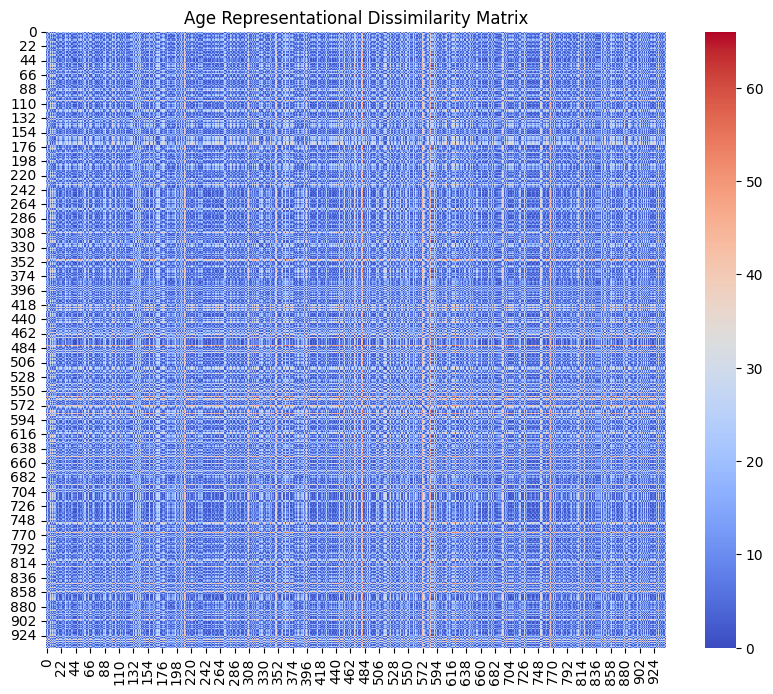

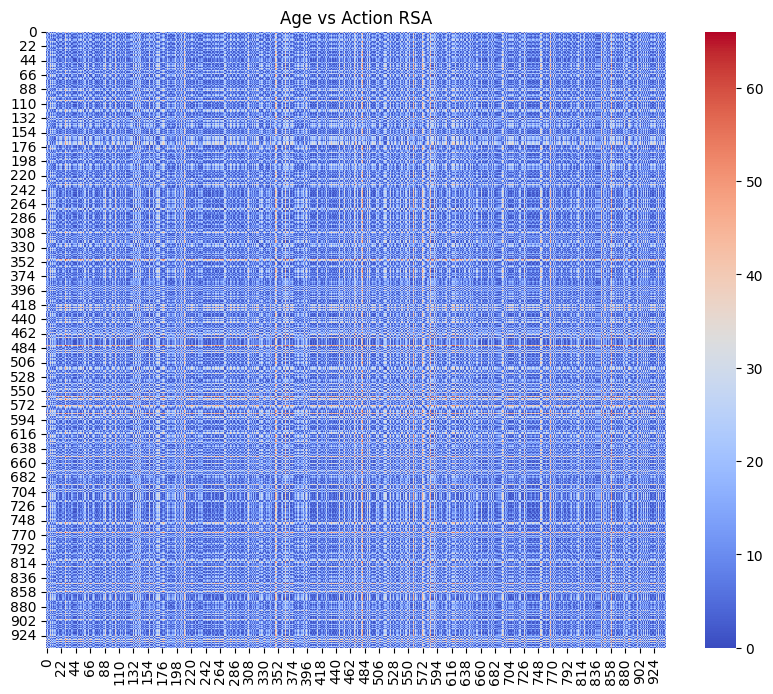

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have calculated RDMs (dissimilarity matrices) for user traits and genres
# For example: age_rdm, gender_rdm, occupation_rdm, and a list of genres

# Combine the RDMs into a single matrix (optional)
#rdms = {
#    'Age': age_rdm,
#    'Gender': gender_rdm,
#    'Occupation': occupation_rdm,
#}

# Visualizing one RSA matrix (e.g., Age RDM vs Genre RDM for 'Action')
def visualize_rdm(rdm, title):
    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(rdm, cmap='coolwarm', annot=False)
    plt.title(title)
    plt.show()

# Example: Visualize the Age RDM
visualize_rdm(age_rdm, 'Age Representational Dissimilarity Matrix')

# Example: Visualize the correlation between Age RDM and a genre (e.g., Action)
# Convert the squareform RDMs back into a matrix format for visualization
def visualize_correlation(correlation_matrix, title, xticklabels, yticklabels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=xticklabels, yticklabels=yticklabels)
    plt.title(title)
    plt.show()

# Example: Visualize the correlation between 'age' and genres like 'Action'
age_vs_action_corr = squareform(pdist(movie_100k_all_complete_userpf[['age', 'Action']], metric='euclidean'))
visualize_rdm(age_vs_action_corr, "Age vs Action RSA")



In [75]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

# Step 1: Create a similarity matrix (ISC) based on genre ratings
# Create a matrix where rows represent users and columns represent genres
user_genre_matrix = movie_100k_all_complete_userpf[genres]

# Compute pairwise correlation between users
isc_matrix = np.corrcoef(user_genre_matrix)

# Step 2: Convert ISC matrix to dissimilarity (1 - correlation)
isc_rdm = 1 - isc_matrix

# Ensure isc_rdm is symmetric and set diagonal to zero
isc_rdm = (isc_rdm + isc_rdm.T) / 2
np.fill_diagonal(isc_rdm, 0)

# Step 3: Create trait RDMs (for Age, Gender, Occupation)
age_rdm = squareform(pdist(movie_100k_all_complete_userpf[['age']], metric='euclidean'))
np.fill_diagonal(age_rdm, 0)  # Ensure diagonal is zero

# Convert Gender to numeric values for RDM creation
movie_100k_all_complete_userpf['gender_numeric'] = movie_100k_all_complete_userpf['gender'].map({'M': 0, 'F': 1})
gender_rdm = squareform(pdist(movie_100k_all_complete_userpf[['gender_numeric']], metric='euclidean'))
np.fill_diagonal(gender_rdm, 0)  # Ensure diagonal is zero

# One-hot encode Occupation to create the occupation RDM
occupation_rdm = squareform(pdist(pd.get_dummies(movie_100k_all_complete_userpf['occupation']), metric='euclidean'))
np.fill_diagonal(occupation_rdm, 0)  # Ensure diagonal is zero

# Step 4: Compare ISC-RDM with trait RDMs for each genre
for genre in genres:
    # Create RDM for each genre
    genre_rdm = squareform(pdist(movie_100k_all_complete_userpf[[genre]], metric='euclidean'))
    genre_rdm = (genre_rdm + genre_rdm.T) / 2  # Ensure symmetry
    np.fill_diagonal(genre_rdm, 0)  # Ensure diagonal is zero

    # ISC-RSA: Calculate the correlations between ISC RDM and trait RDMs
    isc_age_correlation = spearmanr(squareform(isc_rdm), squareform(age_rdm)).correlation
    isc_gender_correlation = spearmanr(squareform(isc_rdm), squareform(gender_rdm)).correlation
    isc_occupation_correlation = spearmanr(squareform(isc_rdm), squareform(occupation_rdm)).correlation

    # Print ISC-RSA correlations for each genre
    print(f"ISC-RSA correlation between Age and {genre}: {isc_age_correlation}")
    print(f"ISC-RSA correlation between Gender and {genre}: {isc_gender_correlation}")
    print(f"ISC-RSA correlation between Occupation and {genre}: {isc_occupation_correlation}")


ISC-RSA correlation between Age and Action: -0.008336852785953424
ISC-RSA correlation between Gender and Action: -0.006517130449928944
ISC-RSA correlation between Occupation and Action: 0.010008352759155159
ISC-RSA correlation between Age and Adventure: -0.008336852785953424
ISC-RSA correlation between Gender and Adventure: -0.006517130449928944
ISC-RSA correlation between Occupation and Adventure: 0.010008352759155159
ISC-RSA correlation between Age and Animation: -0.008336852785953424
ISC-RSA correlation between Gender and Animation: -0.006517130449928944
ISC-RSA correlation between Occupation and Animation: 0.010008352759155159
ISC-RSA correlation between Age and Children: -0.008336852785953424
ISC-RSA correlation between Gender and Children: -0.006517130449928944
ISC-RSA correlation between Occupation and Children: 0.010008352759155159
ISC-RSA correlation between Age and Comedy: -0.008336852785953424
ISC-RSA correlation between Gender and Comedy: -0.006517130449928944
ISC-RSA corre

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000 -0.168141  0.481289  0.095349 -0.078746  0.587946 -0.069702   
2       -0.168141  1.000000  0.084617  0.106639  0.713601  0.046416 -0.071036   
3        0.481289  0.084617  1.000000  0.806008 -0.243479  0.569755 -0.178223   
4        0.095349  0.106639  0.806008  1.000000 -0.243159  0.301704 -0.103859   
5       -0.078746  0.713601 -0.243479 -0.243159  1.000000  0.165968 -0.074923   
...           ...       ...       ...       ...       ...       ...       ...   
939     -0.547911  0.644618 -0.023663  0.372720  0.205335 -0.386417  0.188814   
940     -0.268013  0.790084  0.093654  0.168694  0.623594  0.317128 -0.067145   
941     -0.453462  0.563697  0.109482  0.356999  0.227071 -0.060636  0.304006   
942     -0.237422  0.397251 -0.447035 -0.387577  0.442645 -0.102481 -0.008372   
943     -0.654795  0.399139 

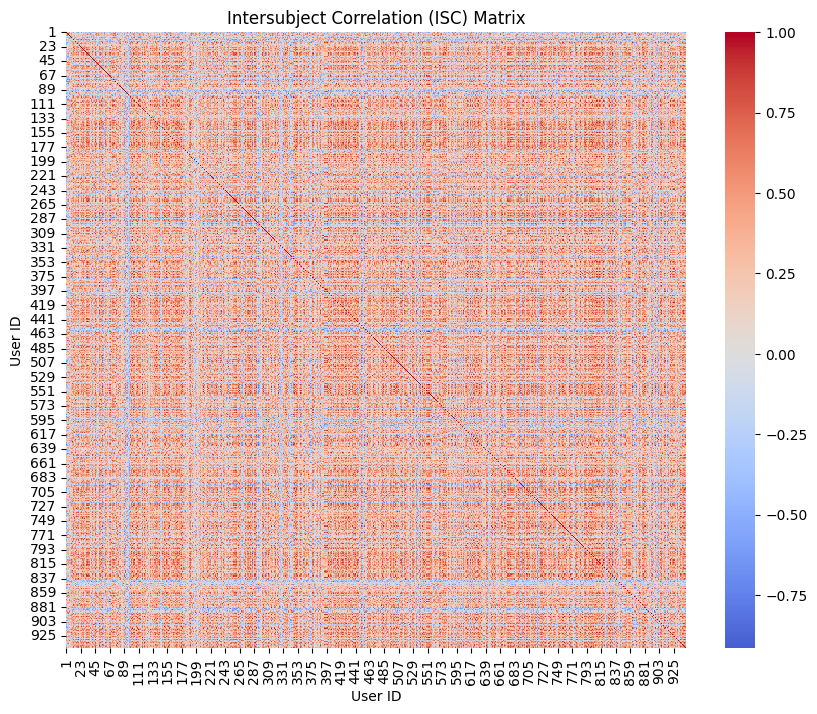

In [76]:
# Create a matrix where rows represent users and columns represent genres
user_genre_matrix = movie_100k_all_complete_userpf[genres]

# Step 2: Compute pairwise correlation between users across all genres
isc_matrix = np.corrcoef(user_genre_matrix)

# Step 3: Create a DataFrame for better readability
isc_df = pd.DataFrame(isc_matrix,
                      index=movie_100k_all_complete_userpf['user_id'],
                      columns=movie_100k_all_complete_userpf['user_id'])

# Step 4: Display the ISC matrix
print(isc_df)

# Optional: Visualize the ISC matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(isc_df, cmap='coolwarm', center=0, annot=False)
plt.title('Intersubject Correlation (ISC) Matrix')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()